In [1]:
!pip install -q transformers nltk tensorflow tensorflow-hub tensorflow_text

## Import libraries

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
# train_prompt_file = "/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv"
# df_train_prompt = pd.read_csv(train_prompt_file)

# train_essay_file = "/kaggle/input/llm-detect-ai-generated-text/train_essays.csv"
# df_train_essay = pd.read_csv(train_essay_file)

# test_essay_file = "/kaggle/input/llm-detect-ai-generated-text/test_essays.csv"
# df_test_essay = pd.read_csv(test_essay_file)

# sub_file = "/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv"
# df_sub = pd.read_csv(sub_file)

In [4]:
# df_train_essay.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [5]:
# df_train_prompt.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [6]:
# df_train_essay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [7]:
# df_train_essay["generated"].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

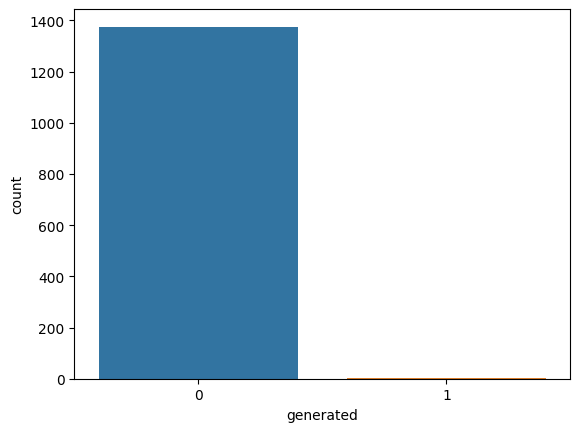

In [8]:
# sns.countplot(x=df_train_essay['generated'])
# plt.show

In [9]:
# df_train_essay["prompt_id"].value_counts()

prompt_id
0    708
1    670
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

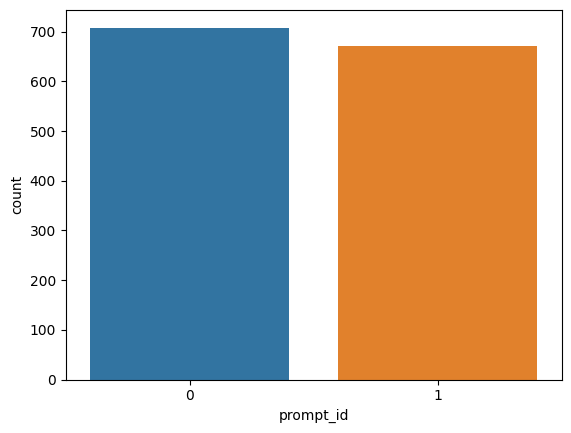

In [10]:
# sns.countplot(x=df_train_essay['prompt_id'])
# plt.show

In [18]:
train_essay_ex_file = "/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv"
train_essay_ex2_file = "/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v1.csv"
df_train_essay_ex = pd.read_csv(train_essay_ex_file)
df_train_essay_ex2 = pd.read_csv(train_essay_ex2_file)

In [19]:
# df_train_essay_ex.rename(columns = {"label":"generated"}, inplace=True)
df_train_essay_ex['label'].value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

In [20]:
df_train_essay_ex2['label'].value_counts()

label
0    14250
1     1621
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

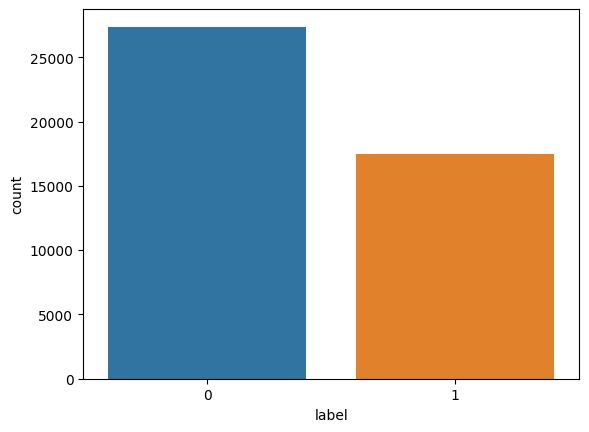

In [22]:
sns.countplot(x=df_train_essay_ex['label'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

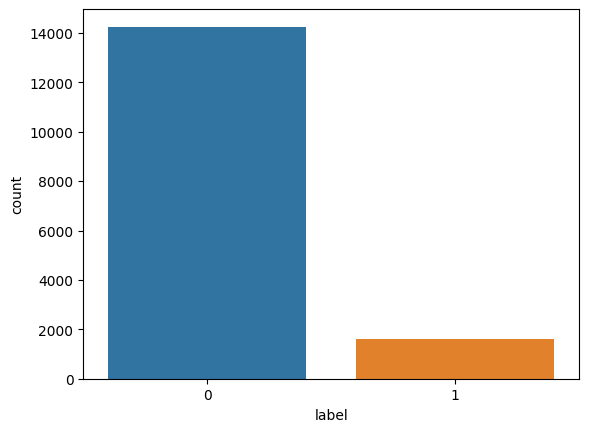

In [23]:
sns.countplot(x=df_train_essay_ex2['label'])
plt.show

### Merge Dataset

In [24]:
df_train = pd.concat([df_train_essay_ex[["text", "label"]],
                                   df_train_essay_ex2[["text", "label"]]])

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60739 entries, 0 to 15870
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60739 non-null  object
 1   label   60739 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [27]:
df_train['label'].value_counts()

label
0    41621
1    19118
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

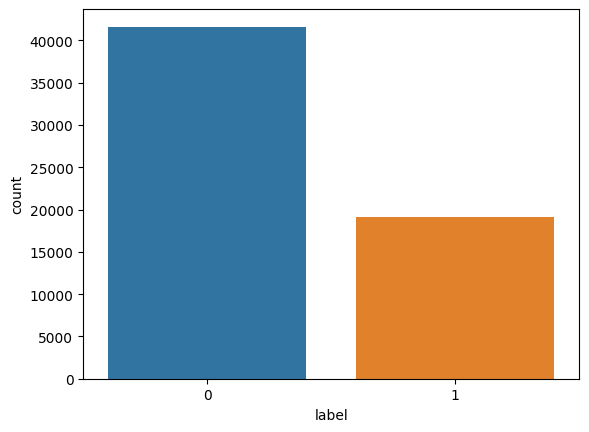

In [29]:
sns.countplot(x=df_train['label'])
plt.show

### Balancing Dataset

In [ ]:
# # Function to balance label counts
# def undersample(df, label_column='generated'):
#     label_counts = df[label_column].value_counts()
#     min_count = label_counts.min()

#     balanced_df = pd.DataFrame()

#     for label, count in label_counts.items():
#         label_subset = df[df[label_column] == label]
#         undersampled_subset = label_subset.sample(n=min_count, random_state=42)
#         balanced_df = pd.concat([balanced_df, undersampled_subset], ignore_index=True)

#     return balanced_df

# # Balance labels in the DataFrame
# df_balanced_train = undersample(df_train)

# Print the balanced DataFrame
# print(df_balanced_train)

<function matplotlib.pyplot.show(close=None, block=None)>

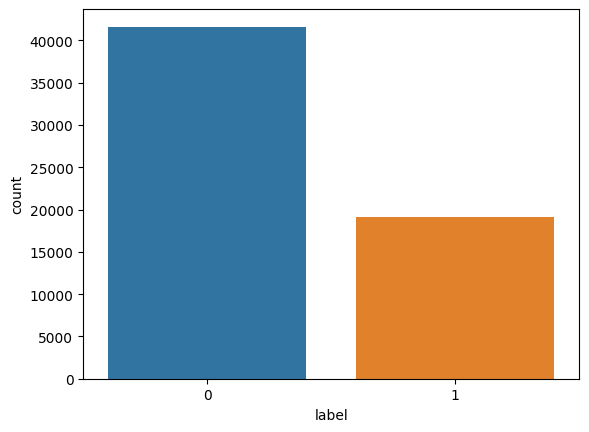

In [30]:
sns.countplot(x=df_train['label'])
plt.show

## Average Len

In [32]:
df_train["text_len"] = df_train["text"].apply(lambda x : len(x.split()))

In [33]:
df_train

,text,label,text_len
0,Phones\n\nModern humans today are always on th...,0,379
1,This essay will explain if drivers should or s...,0,366
2,Driving while the use of cellular devices\n\nT...,0,178
3,Phones & Driving\n\nDrivers should not be able...,0,212
4,Cell Phone Operation While Driving\n\nThe abil...,0,332
...,...,...,...
15866,"While some find the ""Face on Mars"" imaged by t...",1,390
15867,Limiting car usage has many benefits for moder...,1,351
15868,The Rise of Driverless Cars\n\nThe development...,1,293
15869,The Open Sea Beckons\n\nThe Seagoing Cowboys p...,1,356


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


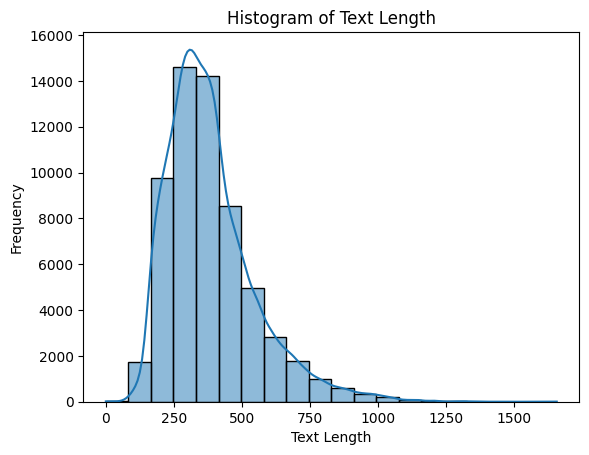

In [34]:
sns.histplot(df_train['text_len'], bins=20, kde=True)
plt.title('Histogram of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [35]:
print(df_train["text_len"].mean())
print(df_train["text_len"].max())

385.76038459638784
1656


seq < 512 => ok

## Data pre-process

In [36]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the stopwords dataset (you can move this line to the main part of your code if you prefer)
# nltk.download('stopwords')
# nltk.download('punkt')

def remove_stopwords(input_text, language='english'):
    """
    Remove stopwords from the input text.

    Parameters:
    - input_text (str): The input text containing stopwords.
    - language (str): The language of the stopwords. Default is 'english'.

    Returns:
    - str: The cleaned text without stopwords.
    """
    # Tokenize the text
    words = word_tokenize(input_text['text'])
    
    print(f"Index {input_text['index_col']}") if input_text['index_col'] % 10000 == 0 else None

    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords.words(language)]

    # Join the filtered words to form the cleaned text
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

In [ ]:
# df_balanced_train['index_col'] = df_balanced_train.index
# df_balanced_train["text"] = df_balanced_train.apply(lambda text: remove_stopwords(text), axis=1)

# df_test_essay['index_col'] = df_test_essay.index
# df_test_essay["text"] = df_test_essay.apply(lambda text: remove_stopwords(text), axis=1)

### Split

In [37]:
from sklearn.model_selection import train_test_split

x, y = df_train['text'], df_train['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2000)


# Model

In [38]:
# Import libraries
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub


In [39]:
model_path = "/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2"
preprocess_path = "/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/"

In [40]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(preprocess_path)
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    model_path,
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 512].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 512].
dense_1 = tf.keras.layers.Dense(128 , activation='relu')(pooled_output)
dropout = tf.keras.layers.Dropout(0.7 , name="dropout1")(pooled_output)
dense_2 = tf.keras.layers.Dense(64 , activation='relu')(dropout)
dropout = tf.keras.layers.Dropout(0.5 , name="dropout2")(dense_2)

dense_out = tf.keras.layers.Dense(1 , activation='sigmoid', name='output')(dropout)


model = tf.keras.Model(inputs=text_input, outputs=dense_out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['input_1[0][0]']             
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
# https://huggingface.co/google/bert_uncased_L-12_H-128_A-2
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss='binary_crossentropy',
              metrics=["acc"])

checkpoint_filepath = 'checkpoint.hdf5'
metric = 'val_accuracy'
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                    monitor=metric,
                                                    verbose=2,
                                                    save_best_only=True,
                                                    mode='max'), 
                 tf.keras.callbacks.EarlyStopping(monitor=metric,
                                                  patience=0,
                                                  restore_best_weights=True)
                ]
history = model.fit(x_train, y_train , batch_size=8, callbacks=[callback_list],
                    epochs=5 , validation_data=(x_test, y_test))
# model.load_weights(checkpoint_filepath)
model.save("model-bert")

Epoch 1/5


# Test

In [ ]:
loss , acc = model.evaluate(x_train, y_train)
print("Accuracy on Train data:",acc)
loss , acc = model.evaluate(x_test, y_test)
print("Accuracy on Test data:",acc)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(x_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))


In [ ]:
y_pred = model.predict(df_test_essay['text'])
y_pred

In [ ]:
submission_data = {'id': df_test_essay['id'], 'generated': y_pred[:, 0]}
submission = pd.DataFrame(submission_data)

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv("/kaggle/working/submission.csv")